In [1]:
# 1. Multiple linear regression
# (a)
import pandas as pd
df = pd.read_csv("auto.csv", na_values = "?")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1AD3B40B8>,
      dtype=object)

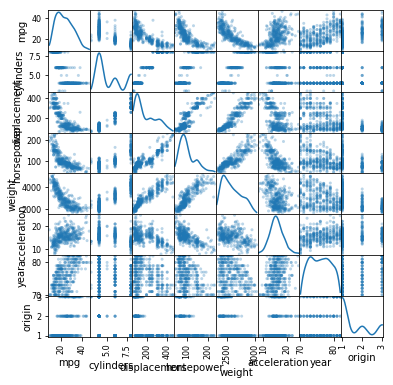

In [2]:
# (b)
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# the last column is not quantitative
scatter_matrix(df.iloc[:, 0:-1], alpha=0.3, figsize=(6, 6), diagonal='kde')

In [4]:
# (c)
df.iloc[:, 0:-1].corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.776260     -0.804443   -0.778427 -0.831739   
cylinders    -0.776260   1.000000      0.950920    0.842983  0.897017   
displacement -0.804443   0.950920      1.000000    0.897257  0.933104   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.831739   0.897017      0.933104    0.864538  1.000000   
acceleration  0.422297  -0.504061     -0.544162   -0.689196 -0.419502   
year          0.581469  -0.346717     -0.369804   -0.416361 -0.307900   
origin        0.563698  -0.564972     -0.610664   -0.455171 -0.581265   

              acceleration      year    origin  
mpg               0.422297  0.581469  0.563698  
cylinders        -0.504061 -0.346717 -0.564972  
displacement     -0.544162 -0.369804 -0.610664  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.419502 -0.307900 -0.581265  
acceleration      1.000000  0.282901  0.210084  
year              0.282901  1.000000  0.184314  
origin            0.210084  0.184314  1.000000

In [5]:
# (d)
import statsmodels.api as sm

df['const'] = 1
reg1 = sm.OLS(endog = df['mpg'], 
              exog = df[['const', 'cylinders', 'displacement', 'horsepower', 'weight', \
                           'acceleration', 'year', 'origin']], missing = 'drop')
reg1.fit().summary()

c:\users\liaoa\appdata\local\programs\python\python36\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        15:06:06   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(i) Coefficients of const, displacement, weight, year and origin are statistically significant at the 1% level.

(ii) Coefficients of cylinders, horsepower and acceleration are not statistically significant at the 10% level.

(iii) A one unit increase in year results in a predicted 0.7508 unit increase in mpg.

(e) From the plot in (b), displacement, horsepower and weight look most likely to have a nonlinear relationship with $mpg_i$.

In [6]:
## (i)
df['displacement_square'] = df['displacement'] ** 2
df['horsepower_square'] = df['horsepower'] ** 2
df['weight_square'] = df['weight'] ** 2
df['acceleration_square'] = df['acceleration'] ** 2

reg2 = sm.OLS(endog = df['mpg'], 
              exog = df[['const', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',\
                        'year', 'origin',\
                        'displacement_square', 'horsepower_square', 'weight_square', 'acceleration_square']], 
              missing = 'drop')
reg2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          1.75e-160
Time:                        15:06:09   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  20.1084      6.696      3.003      0.003       6.943      33.274
cylinders               0.2519      0.326      0.773      0.440      -0.389       0.893
displacement           -0.0169      0.020     -0.828      0.408      -0.057       0.023
horsepower             -0.1635      0.041     -3.971      0.000      -0.244      -0.083
weight                 -0.0136      0.003     -5.069      0.000      -0.019      -0.008
acceleration           -2.0884      0.557     -3.752      0.000      -3.183      -0.994
year                    0.7810      0.045     17.512      0.000       0.693       0.869
origin                  0.6104      0.263      2.320      0.021       0.093       1.128
displacement_square  2.257e-05   3.61e-05      0.626      0.532   -4.83e-05    9.35e-05
horsepower_square       0.0004      0.000      2.943      0.003       0.000       0.001
weight_square        1.514e-06   3.69e-07      4.105      0.000    7.89e-07    2.24e-06
acceleration_square     0.0576      0.016      3.496      0.001       0.025       0.090
==============================================================================
Omnibus:                       33.614   Durbin-Watson:                   1.576
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.985
Skew:                           0.438   Prob(JB):                     1.16e-17
Kurtosis:                       5.002   Cond. No.                     5.13e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(ii) The adjusted R-squared statistic is 0.866, which is better than 0.818, the adjusted R-squared statistic in part(d).

(iii) The $displacement_i$ variable coefficient and the coefficient on its squared term become statistical insignificant.

(iv) The coefficient of the cylinders variable become more statistical insignificant.

In [7]:
# (f)
predict_value = reg2.fit().predict(exog=[1, 6, 200, 100, 3100, 15.1, 99, 1,  200 ** 2, 100 ** 2, 3100 ** 2, 15.1 ** 2])
print('The predicted miles per gallon mpg of a car with 6 cylinders, displacement of 200, \
horsepower of 100, a weight of 3,100, acceleration of 15.1, model year of 1999, and origin of 1 is',
predict_value)

The predicted miles per gallon mpg of a car with 6 cylinders, displacement of 200, horsepower of 100, a weight of 3,100, acceleration of 15.1, model year of 1999, and origin of 1 is [38.7321111]


In [8]:
# 2.Classification problem: KNN by hand and in Python
# (a)
import numpy as np

X_digits = [(0, 3, 0), (2, 0, 0), (0, 1, 3), (0, 1, 2), (-1, 0 ,1), (1, 1, 1)]
Y_digits = ['red', 'red', 'red', 'green', 'green', 'red']

X_digits = np.array(X_digits)
dist = np.sqrt((X_digits[:, 0] - 0 ) ** 2 + (X_digits[:, 1] - 0 ) ** 2 + (X_digits[:, 2] - 0) ** 2)
dist

array([3.        , 2.        , 3.16227766, 2.23606798, 1.41421356,
       1.73205081])

In [9]:
# (b)
from sklearn import datasets, neighbors, linear_model

n_samples = len(X_digits)

knn_1 = neighbors.KNeighborsClassifier(n_neighbors = 1)

knn_1.fit(X_digits, Y_digits)
knn_1.predict([(0, 0, 0)])

array(['green'], dtype='<U5')

The KNN prediction with K = 1 is "green", as the nearest point $Obs._5$ (-1, 0 ,1)  with distance 1.41421356  is "green".

In [10]:
# (c)
knn_2 = neighbors.KNeighborsClassifier(n_neighbors = 3)

knn_2.fit(X_digits, Y_digits)
knn_2.predict([(0, 0, 0)])

array(['red'], dtype='<U5')

The KNN prediction with K = 3 is "red", as two of the top three nearest points $Obs._2$ (2, 0, 0) with distance 2 and $Obs._6$ (1, 1, 1) with distance 1.73205081 are "red", and only one of them, $Obs._5$ (-1, 0 ,1)  with distance 1.41421356, is green. Therefore, the test point is more likely to be "red".

(d) If the Bayes decision boundary is highly non-linear, we expect the best value for K to be small. This is because the non-linear boundary is greatly influenced by every single point in the dataset, which is consistent with smaller K-value for looking for k-nearest neightbours. If K is large, the boundary tends to be linear, as it must trade-off more distances from points around the boundary.

In [11]:
# (e)
knn_3 = neighbors.KNeighborsClassifier(n_neighbors = 2)

knn_3.fit(X_digits, Y_digits)
knn_3.predict([(1, 1, 1)])

array(['green'], dtype='<U5')

The test point X1 = X2 = X3 = 1 with K = 2 is predicted to be "green".Multivariable logistic (logit) regression (3 points).

In [12]:
# 3. Multivariable logistic regression
cutoff = df['mpg'].median()

def mpg_trans(col):
    mpg = col
    if mpg >= cutoff:
        return 1
    else:
        return 0
    
df['mpg_high'] = df['mpg'].apply(mpg_trans)

In [13]:
# (a)
from scipy import stats

LogitModel = sm.Logit(endog = df['mpg_high'], 
                      exog = df[['const', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']],
                      missing = 'drop')
LogitReg_sm = LogitModel.fit()

stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
LogitReg_sm.summary()

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Sun, 04 Feb 2018   Pseudo R-squ.:                  0.7101
Time:                        15:06:39   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626      0.423     -0.384      0.701      -0.992       0.667
displacement     0.0021      0.012      0.174      0.862      -0.021       0.026
horsepower      -0.0410      0.024     -1.718      0.086      -0.088       0.006
weight          -0.0043      0.001     -3.784      0.000      -0.007      -0.002
acceleration     0.0161      0.141      0.114      0.910      -0.261       0.293
year             0.4295      0.075      5.709      0.000       0.282       0.577
origin           0.4773      0.362      1.319      0.187      -0.232       1.187
================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Weight and year have coefficients that are statistically significant at the 5% level.

In [14]:
# (b)
from sklearn.cross_validation import train_test_split

df.dropna(inplace=True)
X = df[['const', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
y = df['mpg_high']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 10)

c:\users\liaoa\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
# (c)
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

print('Intercept is :', LogReg.intercept_)
print('Coefficients are :', LogReg.coef_)

Intercept is : [-0.03144305]
Coefficients are : [[-0.03144305 -0.32570882  0.00034643 -0.05238895 -0.00491359 -0.18112262
   0.30945703 -0.09264595]]


In [16]:
# (d)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = LogReg.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[86, 13],
       [12, 85]], dtype=int64)

In [17]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.87      0.87        99
          1       0.87      0.88      0.87        97

avg / total       0.87      0.87      0.87       196



This model can predict low mpg (mpg high=0) and high mpg (mpg high=1) really well, though it performs slightly better when predicting low mpg.